In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


T = 303.15
param_str = 'TZVP'
molecule_vec = ['difluoromethane', '1,1,1,2-tetrafluoroethane', 'pentafluoroethane', 
                '1-ethyl-3-methyl-imidazolium', 'perfluorooctanesulfonate', 'tetra-n-butylammonium', 'perfluorobutanesulfonate', 'tetra-n-butylphosphonium', 'br', 
                'perfluoropentanoic_acid']
des_vec = ['c2m_hdfs_pfpa-1_2', 'tba_nfs_pfpa-1_2', 'tbp_br_pfpa-1_2']
data_inp = 'sigma_profiles/'+param_str+'.xlsx'

In [40]:
data = pd.read_excel(data_inp, sheet_name=None)
svec, psvec, msvec = [], [], []
for i in range(len(molecule_vec)):
    svec = data[molecule_vec[i]]['s [e/A^2]'].values
    psvec.append(data[molecule_vec[i]]['p(s)'].values)
    try:
        msvec.append(data[molecule_vec[i]]['m(s)'].values)
    except:
        continue
ps_r32, ps_r134a, ps_r125, ps_c2m, ps_hdfs, ps_tba, ps_nfs, ps_tbp, ps_br, ps_pfpa = psvec
ms_r32, ms_r134a, ms_r125, ms_pfpa = msvec

msvec = []
for i in range(len(des_vec)):
    try:
        msvec.append(data[des_vec[i]]['m(s)'].values)
    except:
        continue
ms_fdes1, ms_fdes2, ms_fdes3 = msvec

as_c2mim, as_hdfs = [574.96, 578.65], [1110.55, 1111.73, 1124.09, 1122.34]
as_tba, as_nfs = [1193.70, 1221.68], [731.68, 732.24, 744.69, 743.71]
as_tbp, as_br = [1280.17, 1249.18], [209.37]
as_pfpa = [689.03, 680.11, 688.23, 679.21, 679.92, 698.12, 698.12]
A_vec = [
    [np.mean(as_c2mim), np.mean(as_hdfs), np.mean(as_pfpa)],
    [np.mean(as_tba), np.mean(as_nfs), np.mean(as_pfpa)],
    [np.mean(as_tbp), np.mean(as_br), np.mean(as_pfpa)]
]
xcon, xaon, xhbd = .25, .25, .50
xfdes = np.array([0.25, 0.25, 0.50])
ps_fdes1 = (xfdes[0]*ps_c2m + xfdes[1]*ps_hdfs + xfdes[2]*ps_pfpa)#/(xfdes[0]*A_vec[0][0] + xfdes[1]*A_vec[0][1] + xfdes[2]*A_vec[0][2])# * (A_vec[0][0] + A_vec[0][1] + A_vec[0][2])
ps_fdes2 = (xfdes[0]*ps_tba +  xfdes[1]*ps_nfs + xfdes[2]*ps_pfpa)#/(xfdes[0]*A_vec[1][0] + xfdes[1]*A_vec[1][1] + xfdes[2]*A_vec[1][2])# * (A_vec[1][0] + A_vec[1][1] + A_vec[1][2])
ps_fdes3 = (xfdes[0]*ps_tbp +   xfdes[1]*ps_br + xfdes[2]*ps_pfpa)#/(xfdes[0]*A_vec[2][0] + xfdes[1]*A_vec[2][1] + xfdes[2]*A_vec[2][2])# * (A_vec[2][0] + A_vec[2][1] + A_vec[2][2])

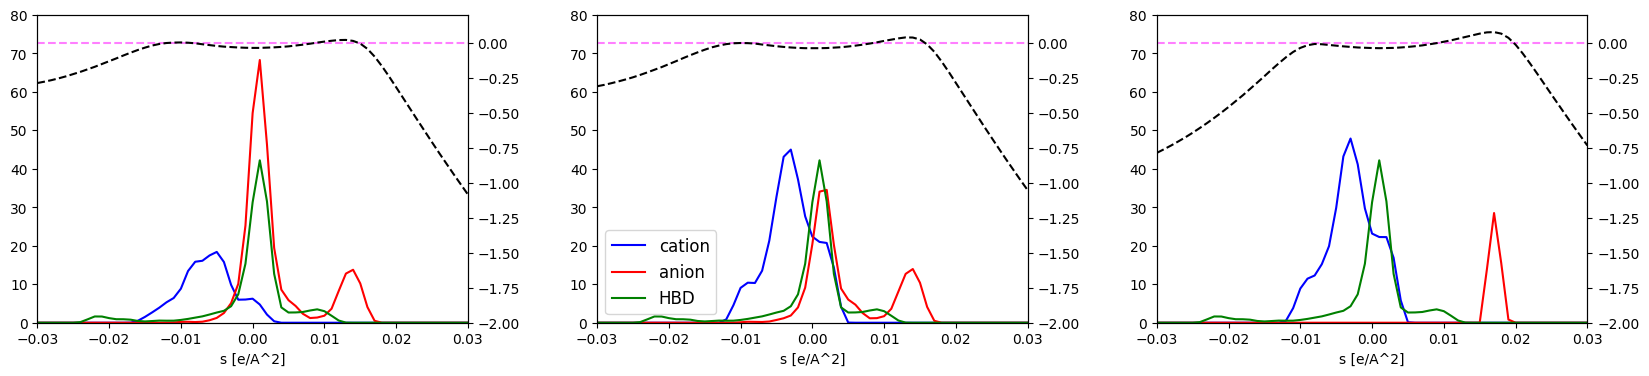

In [42]:
ps_con = [ps_c2m, ps_tba, ps_tbp]
ps_aon = [ps_hdfs, ps_nfs, ps_br]
ps_hbd = ps_pfpa
ms_fdes = [ms_fdes1, ms_fdes2, ms_fdes3]

fig, axs = plt.subplots(1, 3, figsize=(20, 4), sharex=True, sharey=False)
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(3):
    axs[i].plot(svec, ps_con[i], label='cation', color='blue')
    axs[i].plot(svec, ps_aon[i], label='anion', color='red')
    axs[i].plot(svec, ps_hbd, label='HBD', color='green')
    axs[i].set_xlim(-.03, .03), axs[i].set_ylim(0, 80)
    axs[i].set_xlabel('s [e/A^2]')
    ax2 = axs[i].twinx()
    ax2.plot([-.03, .03], [0, 0], color='magenta', linestyle='--', alpha=0.5)
    ax2.plot(svec, ms_fdes[i], label='m(s)', color='black', linestyle='--')
    ax2.set_ylim(-2.0, 0.2)
axs[1].legend(loc='lower left', fontsize=12)

np.savetxt('sigma_profiles/sprof_fdes-'+param_str+'.txt', 
           np.array([svec, ps_con[0], ps_aon[0], ps_con[1], ps_aon[1], ps_con[2], ps_aon[2], ps_hbd, ps_fdes1, ps_fdes2, ps_fdes3]).T,
              header='   s/e/A2\t   pC2M(s)\t  pHDFS(s)\t   pTBA(s)\t    pNFS(s)\t    pTBP(s)\t      pBr(s)\t   pPFPA(s)\t pFDES1(s)\t pFDES2(s)\t pFDES3(s)',
              fmt='%10.5f', delimiter='\t')
np.savetxt('sigma_profiles/spot_fdes-'+param_str+'.txt',
           np.array([svec, ms_fdes[0], ms_fdes[1], ms_fdes[2]]).T,
              header='   s/e/A2\tmuFDES1(s)\tmuFDES2(s)\tmuFDES3(s)',
              fmt='%10.5f', delimiter='\t')

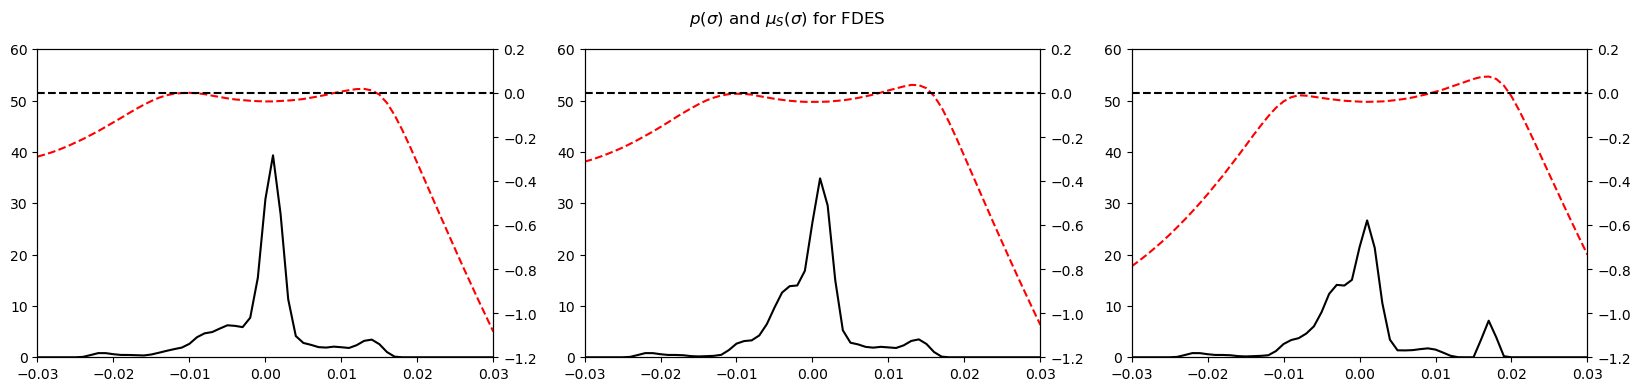

In [6]:
ps_fdes = [ps_fdes1, ps_fdes2, ps_fdes3]
ms_fdes = [ms_fdes1, ms_fdes2, ms_fdes3]

fig, axs = plt.subplots(1, 3, figsize=(20, 4))
fig.suptitle(r'$p(\sigma)$ and $\mu_S(\sigma)$ for FDES')
for i in range(3):
    axs[i].plot(svec, ps_fdes[i], color='k')
    ax2 = axs[i].twinx()
    ax2.plot(svec, ms_fdes[i], 'r--')
    ax2.plot([-.03, .03], [0, 0], 'k--')
    axs[i].set_xlim(-.03, .03), axs[i].set_ylim(0, 60)
    ax2.set_ylim(-1.2, 0.2)

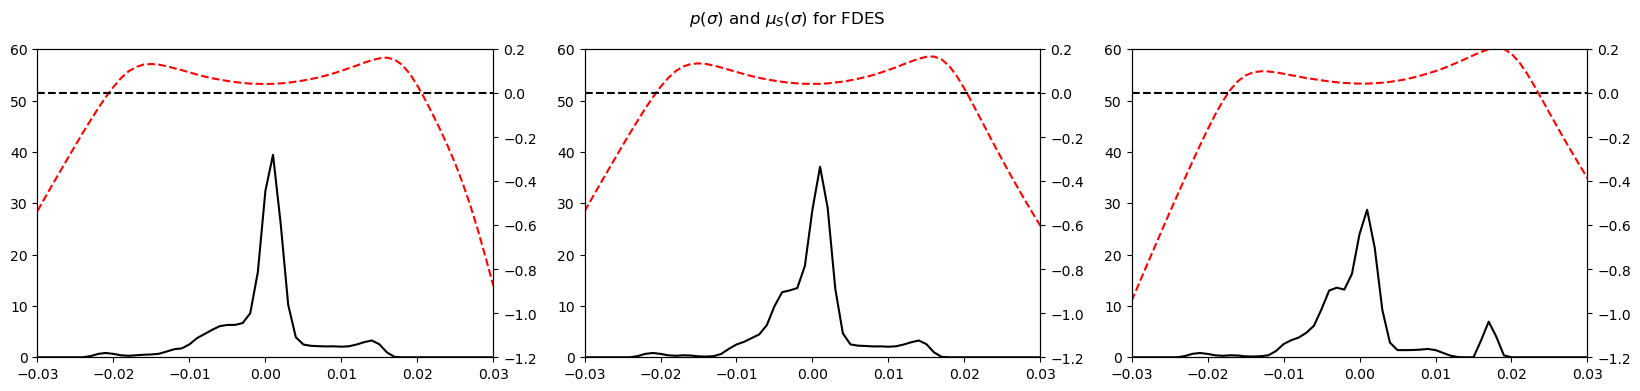

In [9]:
ps_fdes = [ps_fdes1, ps_fdes2, ps_fdes3]
ms_fdes = [ms_fdes1, ms_fdes2, ms_fdes3]

fig, axs = plt.subplots(1, 3, figsize=(20, 4))
fig.suptitle(r'$p(\sigma)$ and $\mu_S(\sigma)$ for FDES')
for i in range(3):
    axs[i].plot(svec, ps_fdes[i], color='k')
    ax2 = axs[i].twinx()
    ax2.plot(svec, ms_fdes[i], 'r--')
    ax2.plot([-.03, .03], [0, 0], 'k--')
    axs[i].set_xlim(-.03, .03), axs[i].set_ylim(0, 60)
    ax2.set_ylim(-1.2, 0.2)

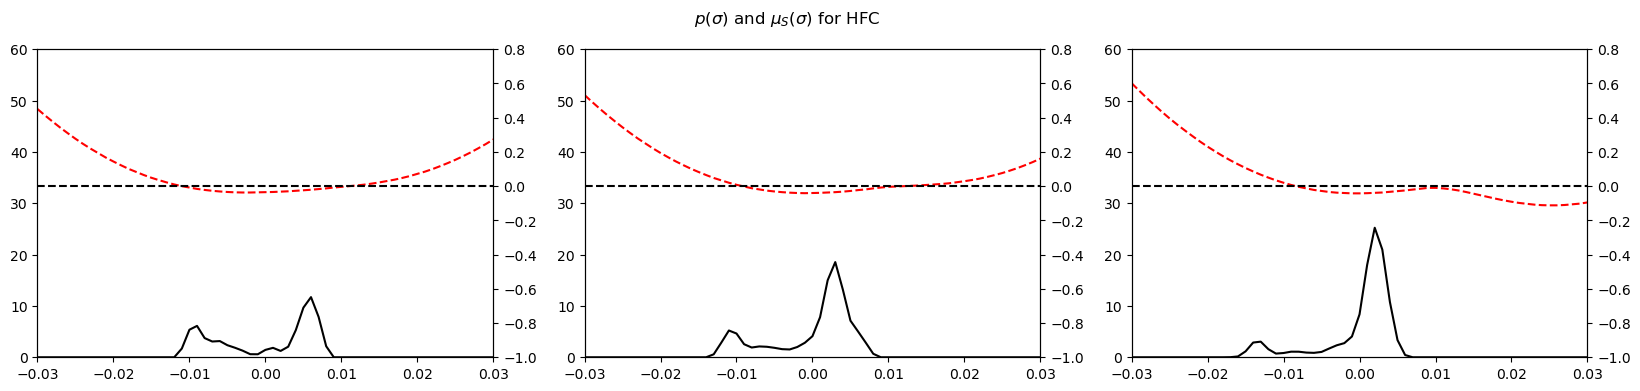

In [5]:
ps_hfc = [ps_r32, ps_r134a, ps_r125]
ms_hfc = [ms_r32, ms_r134a, ms_r125]

fig, axs = plt.subplots(1, 3, figsize=(20, 4))
fig.suptitle(r'$p(\sigma)$ and $\mu_S(\sigma)$ for HFC')
for i in range(3):
    axs[i].plot(svec, ps_hfc[i], color='k')
    ax2 = axs[i].twinx()
    ax2.plot(svec, ms_hfc[i], 'r--')
    ax2.plot([-.03, .03], [0, 0], 'k--')
    axs[i].set_xlim(-.03, .03), axs[i].set_ylim(0, 60)
    ax2.set_ylim(-1, 0.8)

np.savetxt('sigma_profiles/sprof_hfc.txt', np.array([svec, ps_r32, ps_r134a, ps_r125]).T, header='s/e/A2\tpR32(s)\tpR134a(s)\tpR134a(s)', fmt='%10.5f')
np.savetxt('sigma_profiles/spot_hfc.txt', np.array([svec, ms_r32, ms_r134a, ms_r125]).T, header='s/e/A2\tmuR32(s)\tmuR134a(s)\tmuR125(s)', fmt='%10.5f')

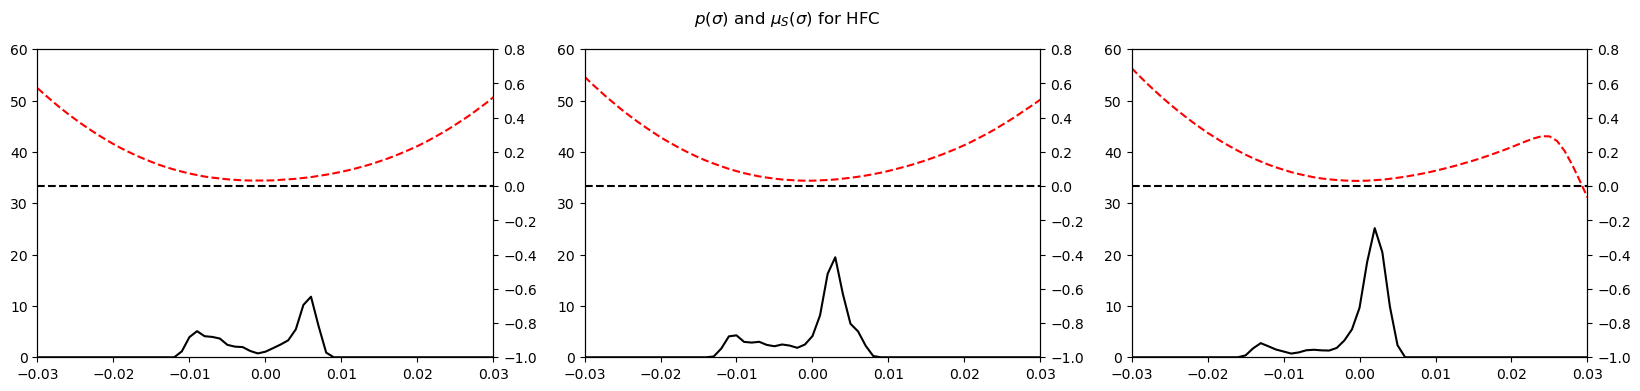

In [10]:
ps_hfc = [ps_r32, ps_r134a, ps_r125]
ms_hfc = [ms_r32, ms_r134a, ms_r125]

fig, axs = plt.subplots(1, 3, figsize=(20, 4))
fig.suptitle(r'$p(\sigma)$ and $\mu_S(\sigma)$ for HFC')
for i in range(3):
    axs[i].plot(svec, ps_hfc[i], color='k')
    ax2 = axs[i].twinx()
    ax2.plot(svec, ms_hfc[i], 'r--')
    ax2.plot([-.03, .03], [0, 0], 'k--')
    axs[i].set_xlim(-.03, .03), axs[i].set_ylim(0, 60)
    ax2.set_ylim(-1, 0.8)

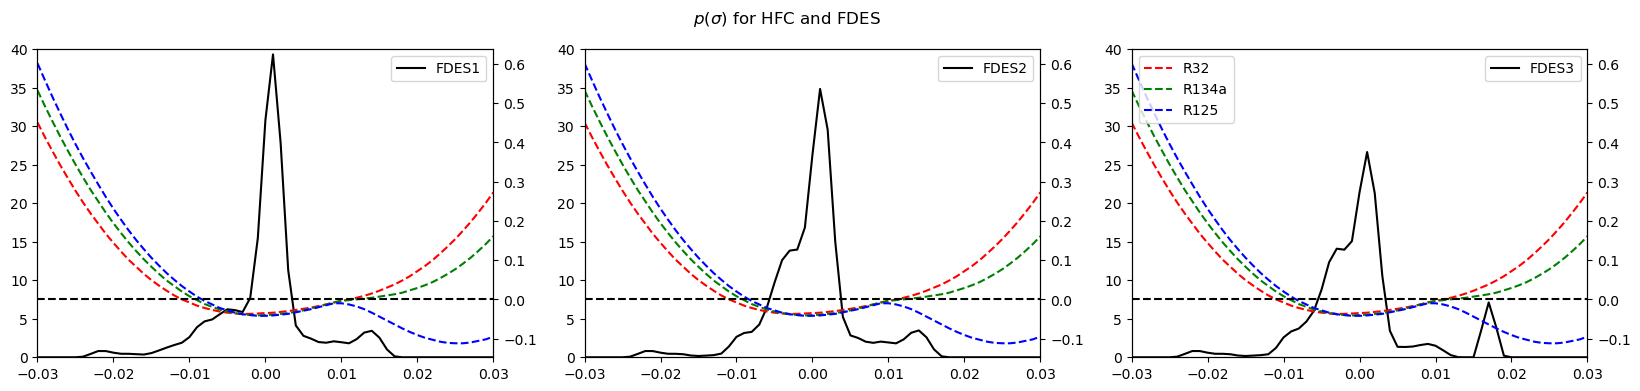

In [59]:
fig, axs = plt.subplots(1, 3, figsize=(20, 4))
fig.suptitle(r'$p(\sigma)$ for HFC and FDES')
#axs[0].plot(svec, ps_fdes1, label='FDES1', color='k')
axs[0].plot(svec, ps_fdes1, label='FDES1', color='k')
ax2 = axs[0].twinx()
ax2.plot(svec, ms_r32, 'r--', label='R32')
ax2.plot(svec, ms_r134a, 'g--', label='R134a')
ax2.plot(svec, ms_r125, 'b--', label='R125')
ax2.plot([-.03, .03], [0, 0], 'k--')
axs[1].plot(svec, ps_fdes2, label='FDES2', color='k')
ax2 = axs[1].twinx()
ax2.plot(svec, ms_r32, 'r--', label='R32')
ax2.plot(svec, ms_r134a, 'g--', label='R134a')
ax2.plot(svec, ms_r125, 'b--', label='R125')
ax2.plot([-.03, .03], [0, 0], 'k--')
axs[2].plot(svec, ps_fdes3, label='FDES3', color='k')
ax2 = axs[2].twinx()
ax2.plot(svec, ms_r32, 'r--', label='R32')
ax2.plot(svec, ms_r134a, 'g--', label='R134a')
ax2.plot(svec, ms_r125, 'b--', label='R125')
ax2.plot([-.03, .03], [0, 0], 'k--')
ax2.legend(loc='upper left')
for i in range(3):
    axs[i].set_xlim(-.03, .03), axs[i].set_ylim(0, 40)
    axs[i].legend()